# Bike Sharing Demand

## 데이터분석과 시각화, 머신러닝 알고리즘으로 시간당 자전거 대여량을 예측하기

이번 캐글 경진대회는 시간당 자전거 대여량을 예측하는 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 입니다. 워싱턴 D.C 소재의 자전거 대여 스타트업 [Capital Bikeshare](https://www.capitalbikeshare.com/)의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표입니다.

사람들이 자전거를 대여하는데는 많은 요소가 관여되어 있을 겁니다. 가령 시간(새벽보다 낮에 많이 빌리겠죠), 날씨(비가 오면 자전거를 대여하지 않을 겁니다), 근무일(근무 시간에는 자전거를 대여하지 않겠죠) 등. 이런 모든 요소를 조합하여 워싱턴 D.C의 자전거 교통량을 예측해주세요. 이번 경진대회에서는 기존까지 배웠던 프로그래밍 언어와 인공지능&머신러닝 능력 외에도, 자전거 렌탈 시장에 대한 약간의 전문지식, 그리고 일반인의 기초 상식을 총동원 할 수 있습니다.

## 컬럼 설명

[데이터셋 다운로드링크](https://www.kaggle.com/c/bike-sharing-demand/data)

  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.
  
## 프로젝트 구성
* 데이터 로드 (load data)
* 데이터 개요
* 데이터 전처리 (pre-processing)
* 모델 생성
* 검증
* 예측
* Kaggle 제출 및 점수확인

## 모듈 import 

필요한 모듈을 import 합니다. 필요에 따라 추가 패키지를 load 할 수 있습니다.

In [ ]:
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/train_bike.csv
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/test_bike.csv

--2021-02-16 01:22:57--  http://sk.jaen.kr:8080/train_bike.csv
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Authentication required."
Reusing existing connection to sk.jaen.kr:8080.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/csv]
Saving to: ‘train_bike.csv’

train_bike.csv      100%[===================>] 633.16K   650KB/s    in 1.0s    

2021-02-16 01:22:59 (650 KB/s) - ‘train_bike.csv’ saved [648353/648353]

--2021-02-16 01:22:59--  http://sk.jaen.kr:8080/test_bike.csv
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Authentication required."
Reusing existing connection to sk.jaen.kr:8080.
HTTP request sent, await

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

## 데이터 로드

**Kaggle 데이터 분석 대회**에서는 일반적으로 2개의 데이터 셋트를 나누어 제공합니다.

1. train: 학습용 데이터 세트. 정답 값이라고 할 수 있는 `label` 값이 같이 제공됩니다.
2. test: 예측용 데이터 세트. 정답 값이 빠진 `feature` 들만 제공됩니다. 우리는 이 `feature`를 활용하여 예측을 진행합니다.
3. submission: 정답 제출용 데이터 세트. 주어진 형식에 맞춰 정답 값을 기입하고 제출합니다.

In [ ]:
train = pd.read_csv("train_bike.csv")
test =  pd.read_csv("test_bike.csv")

In [ ]:
#train, test 크기 출력
print(train.shape) 
print(test.shape)

(10886, 12)
(6493, 9)


In [ ]:
#train 상위 5개 데이터 조회
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#test 상위 데이터 5개 조회
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek,quarter
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3,1


## 데이터 개요 확인

로드한 DataFrame의 가장 기본적인 데이터 구조 및 결측치를 확인합니다.

In [ ]:
#train, test 크기 조회
print((train.shape, test.shape))


((10886, 12), (6493, 9))


In [ ]:
#train df의 정보 조회
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#train df의 정보 조회
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#train 데이터의 누락데이터 갯수 조회
train.isna().sum(axis=0)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
#test 데이터의 누락데이터 갯수 조회
test.isna().sum(axis=0)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

## 탐색적 데이터 분석 (EDA)

In [ ]:
#train 데이터 프레임의 datetime 컬럼 데이터 타입을 datetime 으로 변경
train['datetime'] = pd.to_datetime(train['datetime'])


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
#train 데이터프레임의 datetime 컬럼 정보를 이용하여 year, month, day, hour, dayofweek, quarter 컬럼에 정보 추가
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['dayofweek']=train['datetime'].dt.dayofweek

#quarter 
train.loc[train['month'] <= 3, 'quarter'] = "1"
train.loc[(train['month'] > 3) & (train['month'] <= 6) , 'quarter'] ="2"
train.loc[(train['month'] > 6) & (train['month'] <= 9) , 'quarter'] ="3"
train.loc[(train['month'] > 9) & (train['month'] <= 12) , 'quarter'] ="4"

In [ ]:
#train df의 추가된 컬럼 정보 조회
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,quarter
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5,1


test 데이터 세트에도 동일하게 적용합니다.

In [ ]:
#test 데이터 프레임에도 동일하게 적용
##datetime column 바꾸기
test['datetime'] = pd.to_datetime(test['datetime'])

#add columns
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['day']=test['datetime'].dt.day
test['hour']=test['datetime'].dt.hour
test['dayofweek']=test['datetime'].dt.dayofweek

#quarter 
test.loc[test['month'] <= 3, 'quarter'] = "1"
test.loc[(test['month'] > 3) & (test['month'] <= 6) , 'quarter'] ="2"
test.loc[(test['month'] > 6) & (test['month'] <= 9) , 'quarter'] ="3"
test.loc[(test['month'] > 9) & (test['month'] <= 12) , 'quarter'] ="4"


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek,quarter
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3,1


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by quarter')]

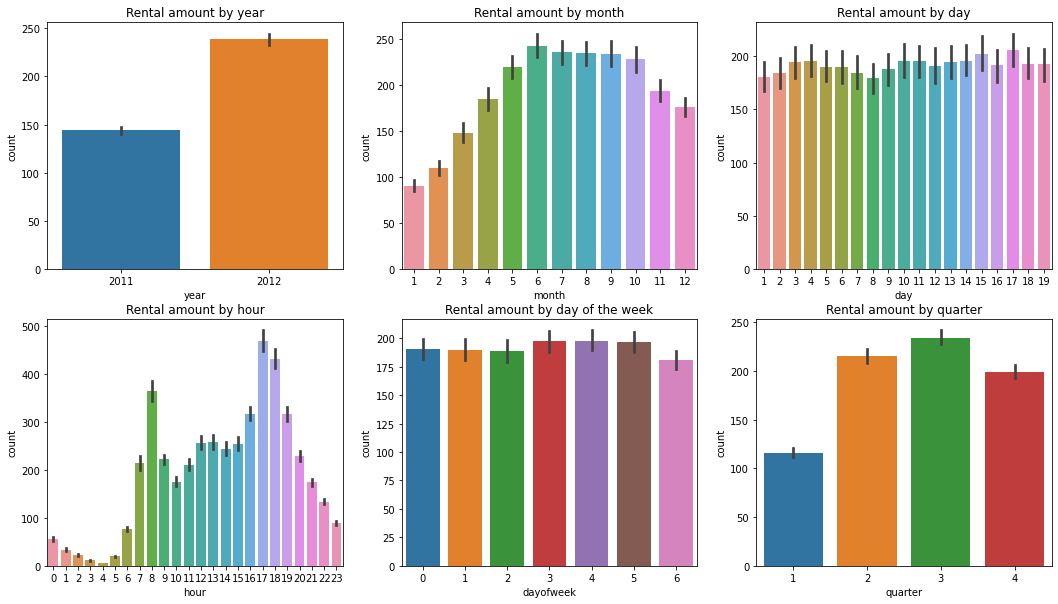

In [ ]:
#seaborn의 barplot을 이용하여 count와 year, month, day, hour, dayofweek, quarter 그래프 그릴것
#시각화 방법 : sns.barplot(data=, x=  , y= , ax= )
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,10)

sns.barplot(data=train, x = "year", y = "count", ax = ax1)
sns.barplot(data=train, x = "month", y = "count", ax = ax2)
sns.barplot(data=train, x = "day", y = "count", ax = ax3)
sns.barplot(data=train, x = "hour", y = "count", ax = ax4)
sns.barplot(data=train, x = "dayofweek", y = "count", ax = ax5)
sns.barplot(data=train, x = "quarter", y = "count", ax = ax6)

ax1.set(ylabel = "count", title = "Rental amount by year")
ax2.set(ylabel = "count", title = "Rental amount by month")
ax3.set(ylabel = "count", title = "Rental amount by day")
ax4.set(ylabel = "count", title = "Rental amount by hour")
ax5.set(ylabel = "count", title = "Rental amount by day of the week")
ax6.set(ylabel = "count", title = "Rental amount by quarter")





### 시즌별 count

In [ ]:
#시즌별 count 평균 계산
chart = train.groupby(by=['season'])['count'].agg(['mean'])
chart

,mean
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


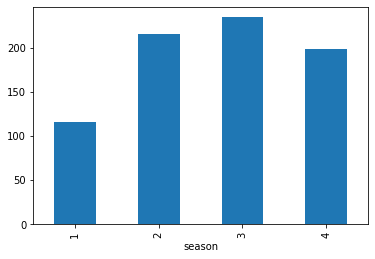

In [ ]:
#해당 chart 결과값을 시각화 : sns.barplot
chart['mean'].plot(kind='bar')


### 자전거 대여량의 분포

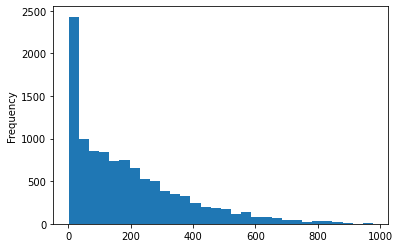

In [ ]:
#train 데이터의 count 컬럼을 이용하여 시각화(히스토그램)
train['count'].plot(kind='hist', bins=30)


## 전처리 (preprocessing)

In [ ]:
#로그 변환 : y값이 비정규 분포 상태이므로 값 변환을 위해 numpy의 log1p 함수를 이용함

train['count_log'] = np.log1p(train['count'])

In [ ]:
#추가한 count_log 정보 조회
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,quarter,count_log
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,1,2.833213
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,1,3.713572
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5,1,3.496508
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5,1,2.639057
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5,1,0.693147


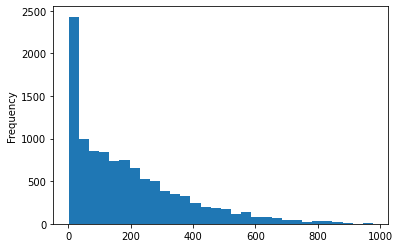

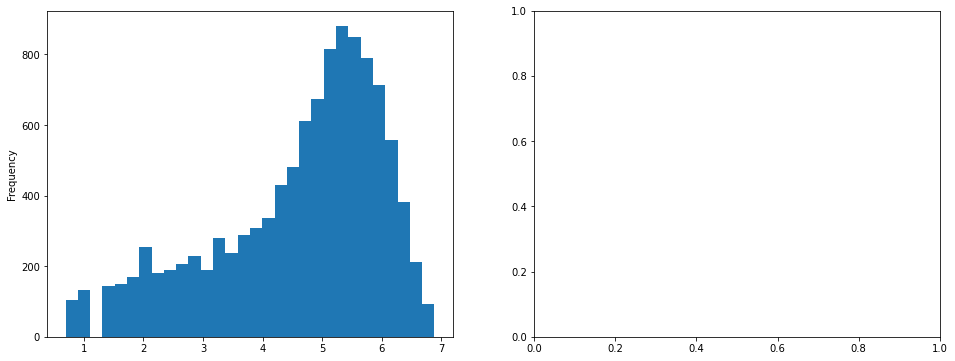

In [ ]:
#변환 후 count 값이 정규 분포 형태를 이루는 것을 히스토그램을 통해 확인


#로그 변환전 count 컬럼 데이터 시각화(히스토그램)
train['count'].plot(kind='hist', bins=30)
plt.figure(figsize=(16,6))
plt.subplot(121)

train['count_log'].plot(kind='hist', bins=30)
plt.subplot(122)

#로그 변환후 count_log 컬럼 데이터 시각화(히스토그램)

## 모델

모델을 정의하고 학습하는 단계입니다.

In [ ]:
features = ['season', 'holiday', 'workingday', 
            'weather', 'temp', 'atemp', 
            'humidity', 'windspeed', 
            'year', 'hour', 'dayofweek']
features

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek']

### 로그 변환을 적용하지 않은 Y값(count 컬럼) 데이터를 이용하여 선형회귀(LinearRegression, Ridge, Lasso) 모델을 만들고 성능을 평가해 봅니다

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso


X = train.drop(['count', 'count_log'], axis=1)
y = train.count
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# Linear Regression
# y_target = train['count']
# x_features = train.drop(['count'], axis=1, inplace=False)

# x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = .3, random_state=0)

# lr = LinearRegression()
# lr.fit(x_train, y_train)
# pred = lr.predict(x_test)

# # evaluate_regr(y_test, pred)

TypeError: ignored

In [ ]:
#Ridge



In [ ]:
#Lasso



### 로그함수 적용 (y값 변환)

In [ ]:
labels = ['count_log']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#log 변환한 y값을 이용하여 데이터를 분리합니다. random_state=0, test_size는 본인이 판단하여 설정해 보세요
#데이터 분할 : train_test_split 이용
X_train, X_test, y_train, y_test = train_test_split(train[features],
                                                    train[labels], test_size=0.2, random_state=0)


In [ ]:
X_train.shape, y_train.shape

((8708, 11), (8708, 1))

In [ ]:
#RandomForestRegressor를 이용하여 모델을 만들고 학습해 봅니다.
#모델 생성
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=0)


In [ ]:
#학습
model.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## 모델 검증

In [ ]:
#생성된 모델을 predict 함수를 통해 X_test 값을 예측해 봅니다
pred = model.predict(X_test)

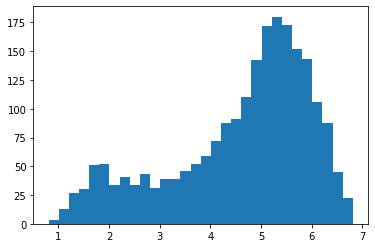

In [ ]:
#예측한 결과를 시각화 해 봅니다.
plt.hist(pred, bins=30)
plt.show()


In [ ]:
#로그 변환된 y값을 지수 함수를 이용하여 원상태로 복원후 시각화 해 봅니다.
#np.log1p()  <-> np.expm1()


**평가지표: Root Mean Squared Logarithmic Error (RMSLE) : 캐글에서 사용하는 평가지표**

In [ ]:
#R2 값 확인
#변환된 데이터 원래 데이터로 변환함

print('train : {:.4f}, test : {:.4f} '.format(model.score(X_train, y_train), model.score(X_test, y_test)))


train : 0.9932, test : 0.9511 


In [ ]:
#다시 원래 데이터로 변형 시킨후(np.expm1) 테스트 

from sklearn.metrics import r2_score
r2_score(np.expm1(y_test), np.expm1(pred))


0.936179747270395

In [ ]:
#캐글에서 사용하는 rmsle 함수 정의
from sklearn.metrics import mean_squared_log_error

def rmsle(actual, pred):
    return np.sqrt(mean_squared_log_error(actual, pred))
  

In [ ]:
#rmsle 함수를 이용하여 만들 모델의 rmsele 값 출력

rmsle(np.expm1(y_test), np.expm1(pred))

0.3181138014691137

## 튜닝(GridSearchCV 적용)

In [ ]:
#params 선언
params = {
    'n_estimators': [200, 300, 500], 
    'max_depth': [5, 10, None], 
    'random_state': [0],
}

In [ ]:
#GridSearchCV를 이용하여 최적의 파라미터 구하기
from sklearn.model_selection import GridSearchCV


In [ ]:
grid_search = GridSearchCV(RandomForestRegressor(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [ ]:
#최적의 파라미터 출력
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
#최적의 모델로 학습



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## 예측

학습한 모델로 test 데이터세트를 예측합니다.

In [ ]:
predictions = model.predict(test[features])

In [ ]:
predictions = np.expm1(predictions)

In [ ]:
predictions

array([17.90900117, 10.17489882,  7.40820786, ..., 93.90922324,
       99.26699992, 55.41545828])